In [128]:
import time

import numpy as np
import matplotlib.pyplot as plt

import scipy.ndimage

In [222]:
def compute_grid(N, dtype=np.float32):
    x = np.linspace(0, 16, N, dtype=dtype)
    y = np.linspace(0, 16, N, dtype=dtype)
    z = np.arange(-2.0, 1e-9, 0.1, dtype=dtype)

    return np.meshgrid(x, y, z)

def get_coords():
    xyz = np.random.rand(16, 3)
    xyz[:, 0] *= 16
    xyz[:, 1] *= 16
    xyz[:, 2] = xyz[:, 2] * 2 - 2
    return xyz

In [224]:
%timeit -n 10 -r 5 compute_grid(128)

289 μs ± 57.8 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [230]:
def compute_maps(N, dtype=np.float32):
    X, Y, Z = compute_grid(N, dtype=dtype)
    xyz = get_coords()

    maps = np.zeros_like(X)

    for atom in xyz:
        maps += np.exp(-((X - atom[0]) ** 2 + (Y - atom[1]) ** 2 + (Z - atom[2]) ** 2) / (2*0.2**2))

    return maps

In [244]:
%timeit -n 10 compute_maps(64, dtype=np.float32)

3.71 ms ± 225 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [270]:
def plot_maps(N, interpolate_to=None):

    maps = compute_maps(N, dtype=np.float32)
    maps = maps.sum(axis=2)

    if interpolate_to is not None:
        maps = scipy.ndimage.zoom(maps, interpolate_to / N, order=1)

    plt.imshow(maps)
    plt.show()

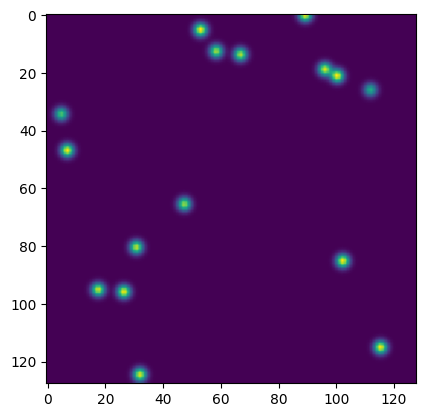

In [273]:
plot_maps(128)

In [ ]:
# calculate how long "compute_maps" takes for different N, and plot the results
# repeat the measurement 5 times and take the average

Ns = [8, 16, 32, 64, 128, 256, 512]
times = []

for N in Ns:
    t = %timeit -n 10 -r 5 -o compute_maps(N)
    times.append(t.best)


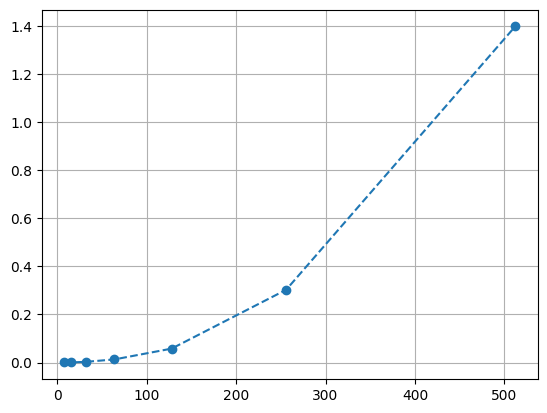

In [127]:
Ns = [8, 16, 32, 64, 128, 256, 512]
plt.plot(Ns, times, "o--")
#plt.xscale('log')
#plt.yscale('log')

plt.grid(which='both')